# Спрос на рейсы авиакомпании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Построение графиков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

Авиакомпании F9, выполняющей внутренние пассажирские перевозки, необходимо понять предпочтения пользователей, покупающих билеты на разные направления.

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У нас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загрузим датасеты
query_1 = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')
query_3 = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

Изучим датасет `query_1`.

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Запрос `query_1` содержит 8 записей и 2 признака: модели самолетов и количество совершенных рейсов для каждой модели в сентябре 2018 года.

Тип данных в столбце `model` - **object**, в столбце `flights_amount` - **int64**. Проблемы с типами данных отсутствуют.

Изучим датасет `query_3`.

In [5]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Запрос `query_3` содержит 101 записm и 2 признака: название города и среднее количество рейсов, прибывающих в город за день в сентябре 2018 года.

Тип данных в столбце `city` - **object**, в столбце `average_flights` - **float64**. Проблемы с типами данных отсутствуют.

В результате вызова метода **describe** наблюдаем положительную ассиметрию, присущую нашему распределению: среднее значение правее медианы и расположено вблизи третьей квартили. 75% наблюдений расположены в интервале от 1 до менее 6 рейсов в среднем за сутки, при этом максимальное значение составляет около 130 рейсов в сутки.

Выведем в порядке убывания топ-10 городов по среднесуточному количеству рейсов.

In [8]:
query_3_top_10 = query_3.sort_values(by='average_flights', ascending=False).head(10)
query_3_top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Видим, что в значительной степени выбиваются первые 3 места. Первое место опережает второе более, чем в 4 раза; второе опережает третье в 1,8 раза; третье опережает четвертое менее, чем в полтора раза.

Округлим величины среднесуточнорго количества рейсов и посчитаем частоту встречаемости округленных значений в датасете.

In [9]:
query_3['average_flights'].round().value_counts()

3.0      20
2.0      20
1.0      18
4.0      11
6.0       8
5.0       6
10.0      5
7.0       3
8.0       3
9.0       2
31.0      1
17.0      1
130.0     1
12.0      1
11.0      1
Name: average_flights, dtype: int64

Наиболее часто встречаются значения от 1 до 3 рейсов сутки с постепенным уменьшением количества с увеличением значения. Показатели, соответстваующие 11 рейсам в сутки и более относятся лишь к одной записи из датасета (объекты являются уникальными).

## Построение графиков

Отсортируем данные в таблице `query_1` по убыванию и построим гистограмму распределения количества рейсов, выполненных за сентябрь 2018 года, по моделям самолетов.

In [10]:
query_1 = query_1.sort_values(by='flights_amount', ascending=False)

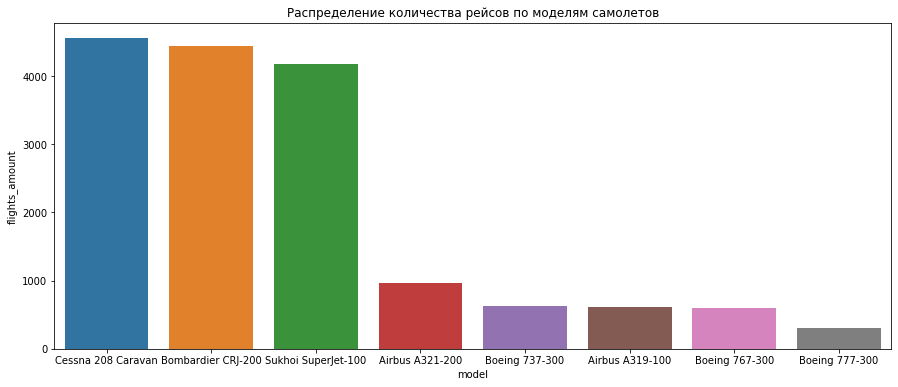

In [11]:
plt.figure(figsize=(15, 6))
sns.barplot(y=query_1['flights_amount'], x=query_1['model'])
plt.title('Распределение количества рейсов по моделям самолетов')
plt.show()

Отчетливо выделяются 2 группы моделей самолетов по количеству рейсов: первые 3 места  - 
- Cessna 208 Caravan - 4557
- Bombardier CRJ-200 - 4446
- Sukhoi SuperJet-100 - 4185

И остальные 5 моделей, которые имеют от 300 до 960 рейсов.

Создадим таблицу с информацией о количестве пассажиров по моделям самолетов.

In [12]:
plane_info = {
    'model':['Airbus A319', 'Airbus A321', 'Boeing 737-300',
             'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
             'Cessna 208 Caravan', 'Sukhoi SuperJet-100'],
    'passengers':[116, 170, 149, 350, 451, 50, 11, 87]}
# в качестве количества пассажиров взяты усредненные данные из открытых источников
plane_info_pd = pd.DataFrame(plane_info)
plane_info_pd

,model,passengers
0,Airbus A319,116
1,Airbus A321,170
2,Boeing 737-300,149
3,Boeing 767-300,350
4,Boeing 777-300,451
5,Bombardier CRJ-200,50
6,Cessna 208 Caravan,11
7,Sukhoi SuperJet-100,87


In [13]:
query_1 = query_1.merge(plane_info_pd, on='model')
query_1['pass_per_day'] = query_1['flights_amount'] * query_1['passengers']

In [14]:
query_1.sort_values(by='pass_per_day')

,model,flights_amount,passengers,pass_per_day
0,Cessna 208 Caravan,4557,11,50127
3,Boeing 737-300,630,149,93870
5,Boeing 777-300,300,451,135300
4,Boeing 767-300,600,350,210000
1,Bombardier CRJ-200,4446,50,222300
2,Sukhoi SuperJet-100,4185,87,364095


Посмотрим на распределение количества пассажиров по моделям самолетов на гистограмме.

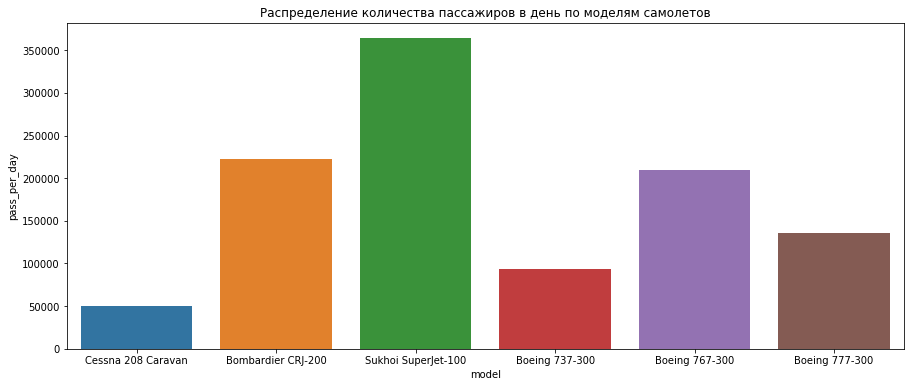

In [15]:
plt.figure(figsize=(15, 6))
sns.barplot(y=query_1['pass_per_day'], x=query_1['model'])
plt.title('Распределение количества пассажиров в день по моделям самолетов')
plt.show()

Пре пересчете на количество пассажиров картина совсем иная: лидер по количеству рейсов **Cessna 208 Caraval** занял последнее место, на 1 месте **Sukhoi SuperJet-100**, находящийся в середине списка моделей самолетов как по количеству рейсов, так и по количеству пассажиров.

Отсортируем данные в таблице `query_3` по убыванию и построим гистограмму распределения количества рейсов, в среднем прибывающих за сутки, по городам.

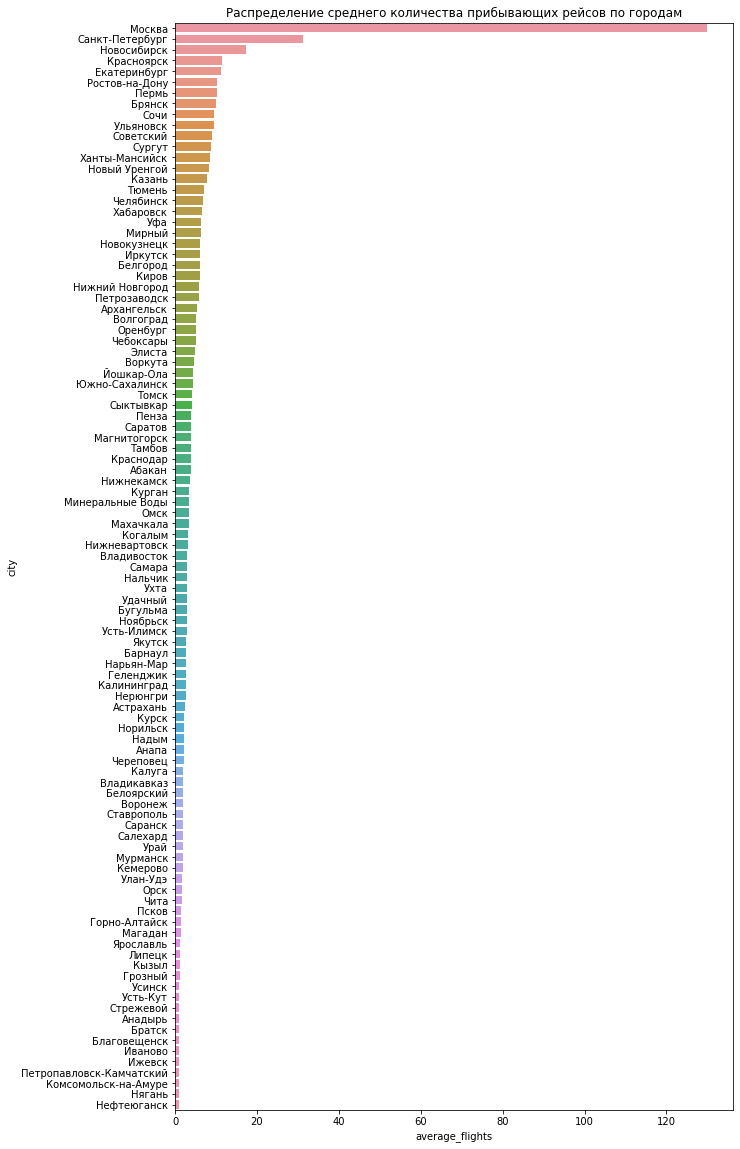

In [16]:
query_3 = query_3.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(10, 20))
sns.barplot(x=query_3['average_flights'], y=query_3['city'])
plt.title('Распределение среднего количества прибывающих рейсов по городам')
plt.show()

Разница между Москвой и другими городами настолько велика, что имеет смысл сравнить Москву и все остальные города вместе взятые.

(Выдвенем предположение, что если бы мы обладали данными о населении городов, могли бы обнаружить устойчивую взаимосвязь между населением города и количеством рейсов).

In [17]:
query_3['region'] = ['Москва' if x == 'Москва' else 
                     'Другие города' for x in query_3['city']]

<Figure size 720x720 with 0 Axes>

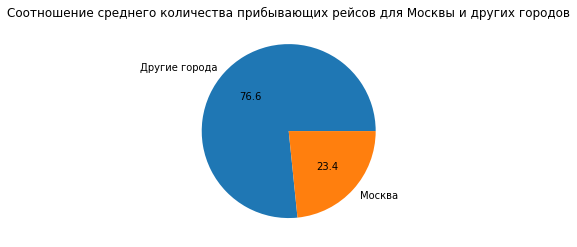

In [18]:
plt.figure(figsize=(10, 10))
query_3_region = query_3.drop('city', axis=1).groupby(['region']).sum().reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(query_3_region['average_flights'], labels=query_3_region['region'], autopct='%.1f')
plt.title('Соотношение среднего количества прибывающих рейсов для Москвы и других городов')
plt.show()

In [19]:
query_3_region

,region,average_flights
0,Другие города,425.138907
1,Москва,129.774194


Хотя по предыдущей гистограмме может показаться, что в Москву в среднем совершается больше рейсов, чем во все остальные города вместе взятые, за счет их большого количества результат оказывается иным: доля рейсов, в среднем прибывающих в Москву за день, составляет около 25% от всех рейсов, отраженных в датасете.

Также посмотрим аналогичное распределение для топ-10 городов по количеству рейсов.

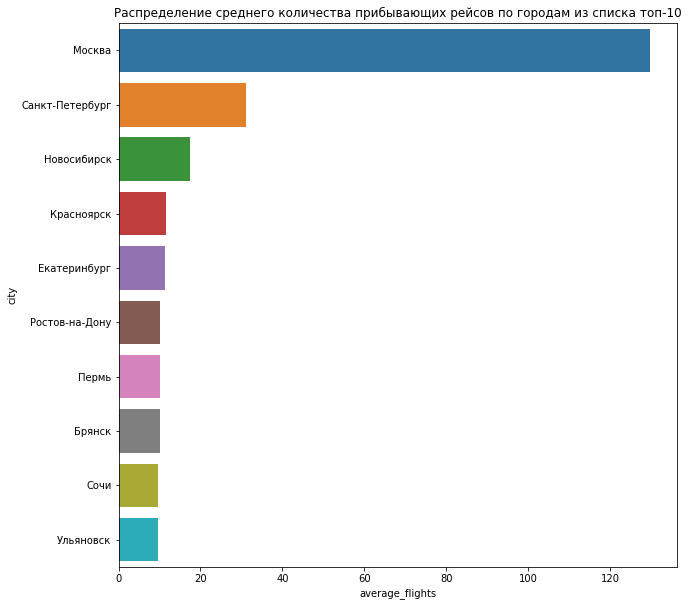

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(x=query_3_top_10['average_flights'], y=query_3_top_10['city'])
plt.title('Распределение среднего количества прибывающих рейсов по городам из списка топ-10')
plt.show()

Наблюдаем заметную корреляцию между количеством рейсов, прилетающих в город, и населением этого города:
- 1. Москва - 12,655 млн. чел.
- 2. Санкт-Петербург - 5,384 млн. чел.
- 3. Новосибирск - 1,62 млн. чел.
- 12. Красноярск - 1,093 млн. чел.
- 4. Екатеринбург - 1,495 млн. чел.
- 10. Ростов-на-Дону - 1,138 млн. чел.
- 14. Пермь - 1,049 млн. чел.
- 50. Брянск - 0,4 млн. чел.
- 46. Сочи - 0,432 млн. чел.
- 22. Ульяновск - 0,625 млн. чел.

Можем сделать вывод о том, что количество прибывающих в город рейсов находится в прямой зависимости от количества людей, проживающих в городе. Отдельным коэффициентом можно выделить отношение города к туристическому или курортному пункту (Санкт-Петербург или Москва в первом случае, и Красноярск или Сочи - во втором).

Из нашего предположения выделяется Брянск. Возможно, ввиду относительной близости к западной границе, он может являеться популярным транзитным городом при выборе маршрута из России в страны ближнего зарубежья и Европу.

## Выводы

1. Количественные данные необходимо тщательно изучать и интерпретировать. На первый взгляд может показаться, что **Cessna 208 Caravan** является самой популярной моделью самолета (исходя из количества рейсов). Однако после поверхностного изучения технических характеристик рассматриваемых моделей самолетов очевидно, что самолеты указанной модели обеспечивают наименьший пассажиропоток. При анализе данных для бизнеса не лишним было бы отметить, что количество перевезенных пассажиров - косвенный показатель дохода, тогда как количество рейсов - расходная статья (чем большее количество пассажиров транспортировано меньшим количеством рейсов, тем лучше).
2. Масштаб может быть обманчивым: значительное превосходство Москвы по сравнению с остальными городами по показателю среднесуточного количества принимаемых рейсов в реальности нивелируется большим количеством других городов. Колоссальная разница при сравнении Москвы с любым из других городов изменится на противоположную при рассмотрении остальных городов в совокупности.
3. Бывает нелишним рассмотреть скрытые параметры: например, количество рейсов в пересчете на население города, или, как было реализовано в текущей задаче, перевод количества рейсов в количество перевезенных пассажиров.
4. Стоит быть аккуратным, реализовывая пункт 3: если данные получены не истрорически (в результате наблюдений). Мы рассчитывали количество перевезенных пассажиров исходя лишь из максимальной пассажировместимости рассматриваемых моделей самолетов. Очевидно, что в реальности ситуация как правило сложнее.